<a href="https://colab.research.google.com/github/tinyelfie/Planetary-Image-Classification/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Planetary Image Classification**



**1. Problem Statement**

Astronomical images of planets and dwarf planets often share similar visual characteristics such as texture, color tone, and surface patterns. This makes automatic classification challenging, especially when using smaller datasets from telescopes or curated image collections.

The goal of this project was to build a classical machine learning system capable of:

**Classifying images** of 11 celestial bodies
(8 planets + Pluto + Makemake + Moon)

**Discovering natural groupings** in the dataset using unsupervised learning

**Extracting meaningful visual features** using classical computer vision

**Analyzing classification errors** and identifying visually similar celestial bodies

This approach demonstrates that traditional ML + feature engineering can still perform competitively in image classification tasks without relying on deep learning.

# **STEP 1 — Define Objectives & Setup**

In [ ]:
# ============================================================
# STEP 1: DEFINE OBJECTIVES & SETUP
# ============================================================

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

# -----------------------------------------------
# 1) Mount Drive & Define dataset path
# -----------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

DATASET_DIR = "/content/drive/MyDrive/Planets"

# -----------------------------------------------
# 2) Define classes
# -----------------------------------------------
CLASSES = [
    "Mercury", "Venus", "Earth", "Mars",
    "Jupiter", "Saturn", "Uranus", "Neptune",
    "Pluto", "Makemake", "Moon"
]

print("Number of classes:", len(CLASSES))
print("Classes:", CLASSES)

# -----------------------------------------------
# 3) Create empty containers
# -----------------------------------------------
images = []
labels = []

# -----------------------------------------------
# 4) Check dataset directory
# -----------------------------------------------
if not os.path.isdir(DATASET_DIR):
    raise Exception("Dataset directory not found. Check DATASET_DIR path.")

print("\nDataset directory found:", DATASET_DIR)

# -----------------------------------------------
# 5) Load dataset & summarize (Requirement C)
# -----------------------------------------------
def load_raw_images():
    print("\nLoading images...")
    per_class_count = {}

    for class_name in CLASSES:
        class_path = os.path.join(DATASET_DIR, class_name)

        if not os.path.isdir(class_path):
            print(f"⚠️ Warning: Folder not found for {class_name}, skipping...")
            continue

        class_images = os.listdir(class_path)
        per_class_count[class_name] = len(class_images)

        for img_name in class_images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                print("⚠️ Skipping unreadable file:", img_path)
                continue

            images.append(img)
            labels.append(class_name)

    print("\n=== DATASET SUMMARY (Requirement C) ===")
    print("Total rows (samples):", len(images))
    print("Total columns (features): Images → feature extraction later")
    print("Number of classes:", len(CLASSES))
    print("\nSamples per class:")

    for planet, count in per_class_count.items():
        print(f"  {planet}: {count} images")

    # Show shape & dtype of first image
    if len(images) > 0:
        print("\nExample image shape:", images[0].shape)
        print("Image data type:", images[0].dtype)

# load images
load_raw_images()

# -----------------------------------------------
# 6) Label encoding
# -----------------------------------------------
label_to_int = {label: idx for idx, label in enumerate(CLASSES)}
int_labels = np.array([label_to_int[l] for l in labels])

# -----------------------------------------------
# 7) Train-test split (raw images)
# -----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    images, int_labels, test_size=0.2, random_state=42, stratify=int_labels
)

print("\nTraining samples:", len(X_train))
print("Testing samples:", len(X_test))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of classes: 11
Classes: ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto', 'Makemake', 'Moon']

Dataset directory found: /content/drive/MyDrive/Planets

Loading images...
⚠️ Warning: Folder not found for Makemake, skipping...

=== DATASET SUMMARY (Requirement C) ===
Total rows (samples): 1489
Total columns (features): Images → feature extraction later
Number of classes: 11

Samples per class:
  Mercury: 149 images
  Venus: 149 images
  Earth: 149 images
  Mars: 149 images
  Jupiter: 149 images
  Saturn: 149 images
  Uranus: 149 images
  Neptune: 149 images
  Pluto: 149 images
  Moon: 148 images

Example image shape: (144, 256, 3)
Image data type: uint8

Training samples: 1191
Testing samples: 298


***STEP 1.5 — EXPLORATORY DATA ANALYSIS (EDA)***


=== STARTING EDA (Exploratory Data Analysis) ===


=== NUMERIC SUMMARY (Requirement 3A) ===

              Mean     Variance      Std Dev     Skewness     Kurtosis  \
count  1489.000000  1489.000000  1489.000000  1489.000000  1489.000000   
mean     52.175610  2451.949756    46.477057     0.740476     0.595314   
std      55.545334  1846.744567    17.088859     1.148043     3.433682   
min      10.497043   384.850184    19.617599    -3.489593    -1.709266   
25%      25.506456  1143.654773    33.817965     0.558302    -1.363960   
50%      32.612088  1748.063364    41.809848     0.806725    -0.685400   
75%      49.773085  3398.376443    58.295595     1.152784     0.636917   
max     222.941162  9005.109380    94.895255     4.030760    21.599876   

               P25          P50          P75  
count  1489.000000  1489.000000  1489.000000  
mean     21.134990    23.315648    91.786602  
std      63.888501    69.944350    58.952843  
min       0.000000     0.000000    11.000000  
25% 

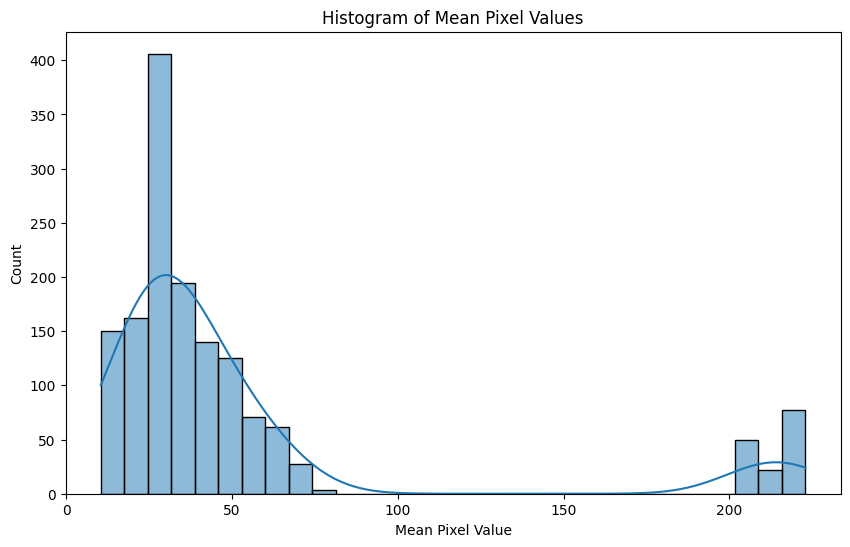

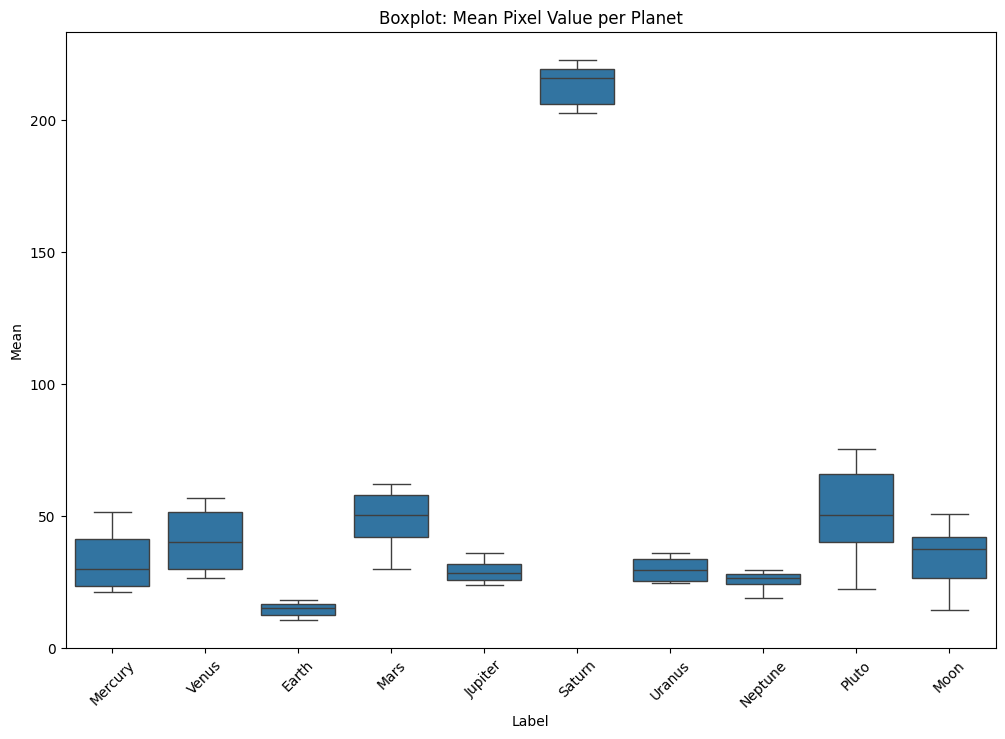

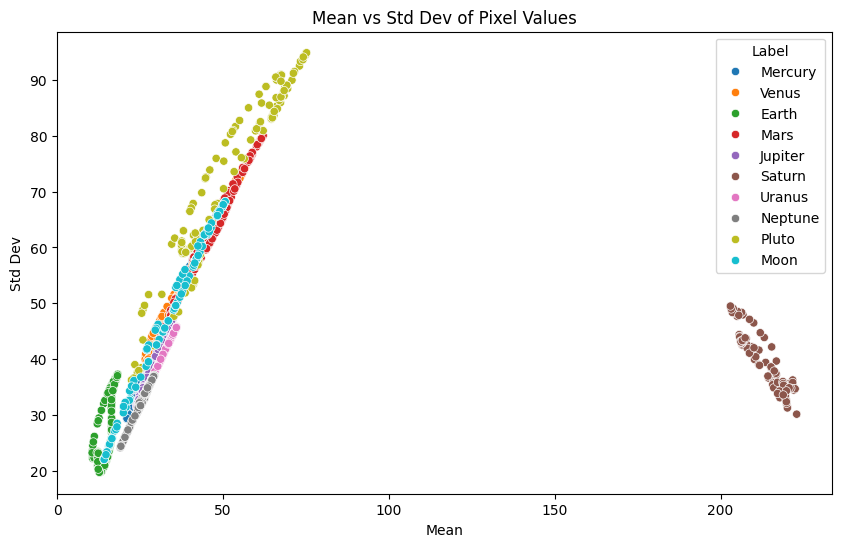

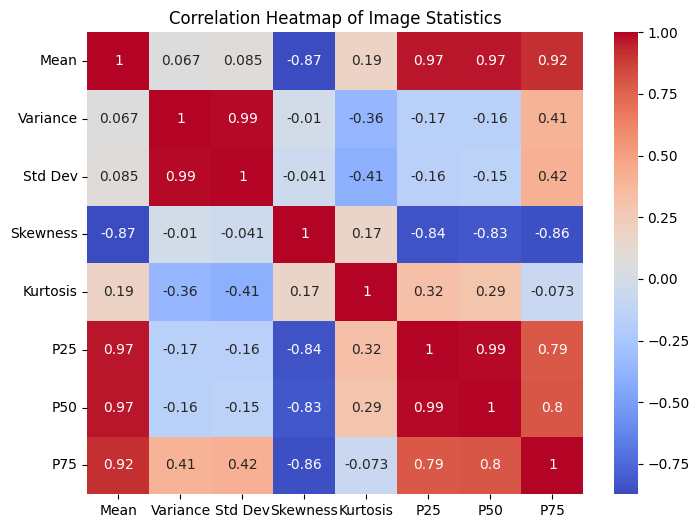

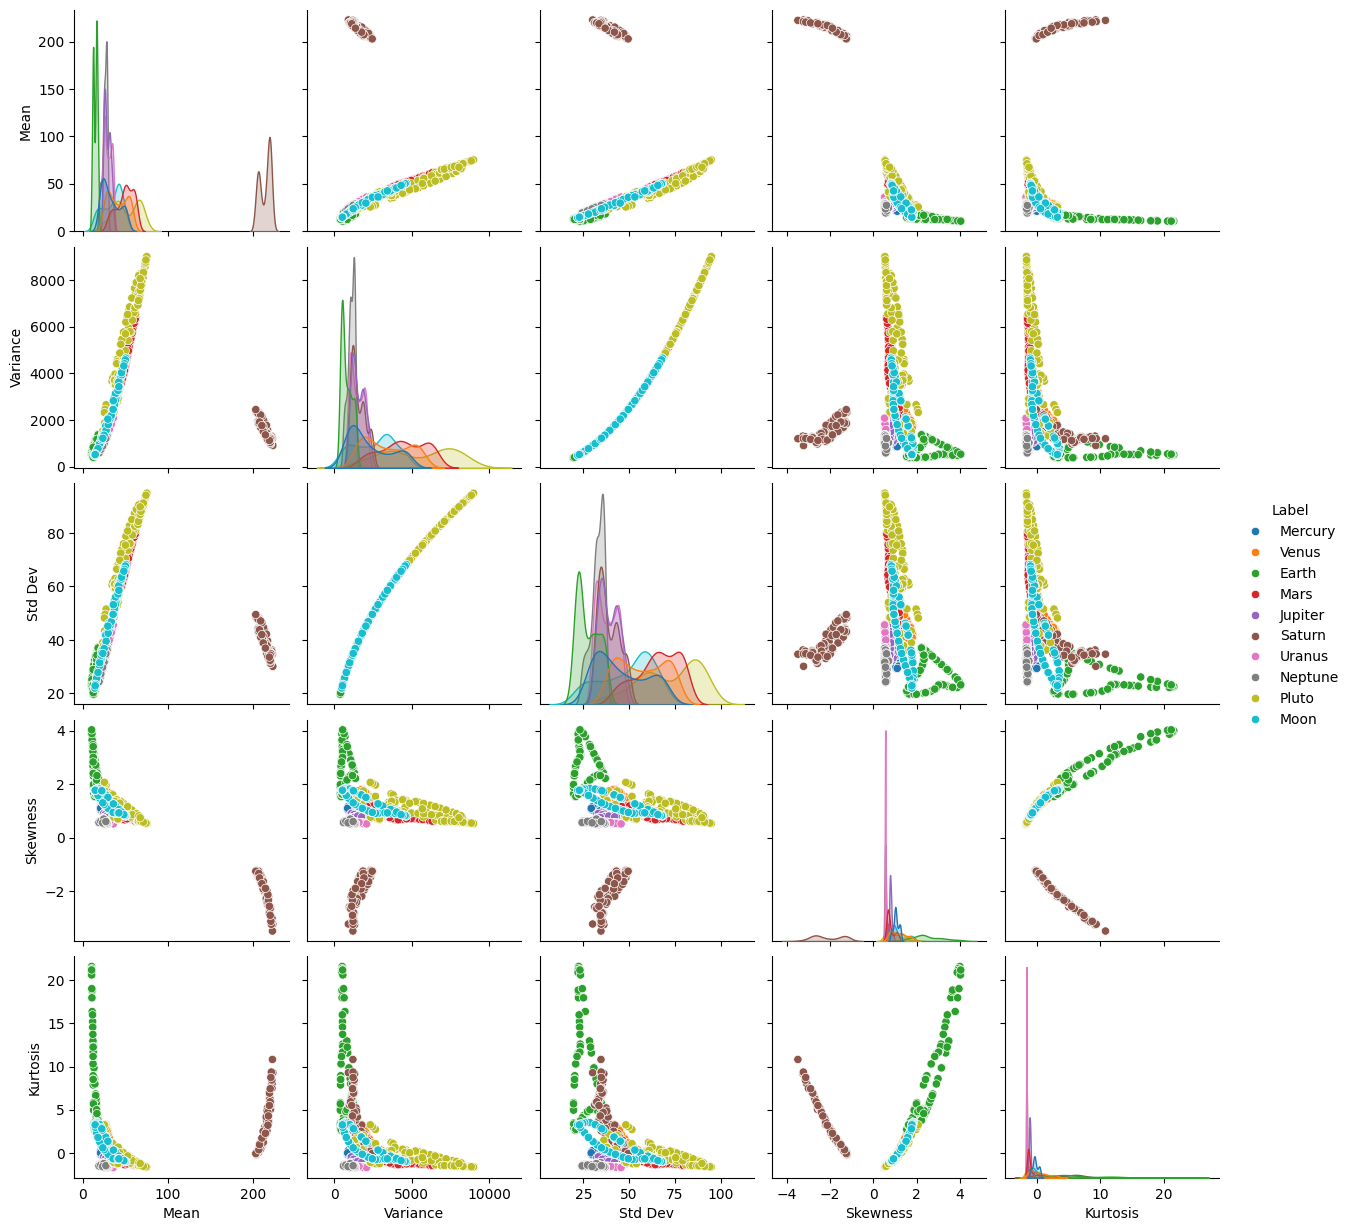


=== EDA Completed ===



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

print("\n=== STARTING EDA (Exploratory Data Analysis) ===\n")

# -----------------------------------------------------------
# Convert images to simple numeric stats for EDA
# -----------------------------------------------------------

mean_vals = []
var_vals = []
std_vals = []
skew_vals = []
kurt_vals = []
p25_vals = []
p50_vals = []
p75_vals = []
img_labels = []

for img, lbl in zip(images, labels):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    pixels = gray.flatten()

    mean_vals.append(np.mean(pixels))
    var_vals.append(np.var(pixels))
    std_vals.append(np.std(pixels))
    skew_vals.append(skew(pixels))
    kurt_vals.append(kurtosis(pixels))
    p25_vals.append(np.percentile(pixels, 25))
    p50_vals.append(np.percentile(pixels, 50))
    p75_vals.append(np.percentile(pixels, 75))
    img_labels.append(lbl)

# -----------------------------------------------------------
# Create EDA dataframe
# -----------------------------------------------------------
eda_df = pd.DataFrame({
    "Label": img_labels,
    "Mean": mean_vals,
    "Variance": var_vals,
    "Std Dev": std_vals,
    "Skewness": skew_vals,
    "Kurtosis": kurt_vals,
    "P25": p25_vals,
    "P50": p50_vals,
    "P75": p75_vals
})

print("\n=== NUMERIC SUMMARY (Requirement 3A) ===\n")
print(eda_df.describe())

print("\n=== SAMPLE EDA ROWS ===\n")
print(eda_df.head())

# -----------------------------------------------------------
# VISUAL ANALYSIS
# -----------------------------------------------------------

# -----------------------------
# 1. Histogram of pixel means
# -----------------------------
plt.figure(figsize=(10,6))
sns.histplot(eda_df["Mean"], bins=30, kde=True)
plt.title("Histogram of Mean Pixel Values")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Count")
plt.show()

# -----------------------------
# 2. Boxplot of brightness distribution by class
# -----------------------------
plt.figure(figsize=(12,8))
sns.boxplot(data=eda_df, x="Label", y="Mean")
plt.xticks(rotation=45)
plt.title("Boxplot: Mean Pixel Value per Planet")
plt.show()

# -----------------------------
# 3. Scatter Plot (Mean vs Std Dev)
# -----------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(data=eda_df, x="Mean", y="Std Dev", hue="Label")
plt.title("Mean vs Std Dev of Pixel Values")
plt.show()

# -----------------------------
# 4. Correlation Heatmap
# -----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(eda_df.drop("Label", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Image Statistics")
plt.show()

# -----------------------------
# 5. Pairplot (Optional but great for EDA)
# -----------------------------
sns.pairplot(eda_df[["Mean", "Variance", "Std Dev", "Skewness", "Kurtosis", "Label"]],
             hue="Label", diag_kind="kde")
plt.show()

print("\n=== EDA Completed ===\n")


# **STEP 2 — IMAGE PREPROCESSING**

In [ ]:
# ============================================================
# STEP 2: IMAGE PREPROCESSING (Resize, Grayscale, Normalize)
# ============================================================

# -----------------------------------------------
# 1) Preprocessing parameters
# -----------------------------------------------
IMG_SIZE = 128       # image size → 128x128
GRAYSCALE = True      # convert RGB to grayscale

# -----------------------------------------------
# 2) Preprocessing function
# -----------------------------------------------
def preprocess_image(img):
    """
    Preprocess a single image:
    - Resize
    - Convert to grayscale (optional)
    - Normalize pixel values [0,1]
    - Flatten into 1D vector
    """
    # Resize image to IMG_SIZE x IMG_SIZE
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    # Convert to grayscale for classical ML
    if GRAYSCALE:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Normalize pixel values (0 to 1)
    img = img.astype('float32') / 255.0

    # Flatten the image (convert 2D → 1D vector)
    img = img.flatten()

    return img
# -----------------------------------------------
# 3) Preprocess all images
# -----------------------------------------------
X = np.array([preprocess_image(img) for img in images])
y = int_labels.copy()

print("Shape of one preprocessed image vector:", X[0].shape)
print("Total preprocessed images:", X.shape[0])

# -----------------------------------------------
# 4) Create a new train-test split after preprocessing
# -----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Shape of one preprocessed image vector: (16384,)
Total preprocessed images: 1489
X_train shape: (1191, 16384)
X_test shape: (298, 16384)


# **STEP 3: FEATURE EXTRACTION (LBP + GLCM + HOG)**


**IMPORT FEATURE LIBRARIES**



In [ ]:
from skimage.feature import local_binary_pattern
from skimage.feature import hog
from skimage.feature import graycomatrix, graycoprops


**LBP (Local Binary Patterns) — Texture**

****

In [ ]:
# -----------------------------------------------
# 1) LBP PARAMETERS
# -----------------------------------------------
LBP_RADIUS = 2
LBP_POINTS = 8 * LBP_RADIUS
LBP_METHOD = 'uniform'

# -----------------------------------------------
# 2) Function to extract LBP features
# -----------------------------------------------
def extract_lbp(gray_img):
    lbp = local_binary_pattern(gray_img, LBP_POINTS, LBP_RADIUS, method=LBP_METHOD)
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, LBP_POINTS + 3),
                             range=(0, LBP_POINTS + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)  # normalize histogram
    return hist


**GLCM (Gray Level Co-occurrence Matrix) — Texture Statistics**

In [ ]:
# -----------------------------------------------
# 3) Function to extract GLCM features
# -----------------------------------------------
def extract_glcm(gray_img):
    glcm = graycomatrix(gray_img,
                        distances=[1],
                        angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
                        levels=256,
                        symmetric=True,
                        normed=True)

    features = []
    props = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']

    for prop in props:
        value = graycoprops(glcm, prop)
        features.append(value.mean())  # average over angles

    return np.array(features)


**HOG (Histogram of Oriented Gradients) — Edges/Shapes**

In [ ]:
# -----------------------------------------------
# 4) Function to extract HOG features
# -----------------------------------------------
def extract_hog(gray_img):
    hog_features, hog_image = hog(gray_img,
                                  orientations=9,
                                  pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2),
                                  block_norm='L2-Hys',
                                  visualize=True)
    return hog_features


**COMBINE ALL FEATURES**

In [ ]:
# -----------------------------------------------
# 5) Main function to extract features for all images
# -----------------------------------------------
def generate_feature_vector(flat_img):
    """
    Input: flattened 1D image from Step 2
    Output: combined_feature_vector (LBP + GLCM + HOG)
    """
    # Reshape flattened image back to (128x128)
    img = (flat_img * 255).reshape(IMG_SIZE, IMG_SIZE).astype('uint8')

    # Extract features
    lbp_feat = extract_lbp(img)
    glcm_feat = extract_glcm(img)
    hog_feat = extract_hog(img)

    # Concatenate into one long vector
    final_vector = np.hstack([lbp_feat, glcm_feat, hog_feat])
    return final_vector


**Extract Features for the Entire Dataset**

In [ ]:
# -----------------------------------------------
# 6) Generate features for all images
# -----------------------------------------------
X_features = np.array([generate_feature_vector(img) for img in X])

print("Feature vector shape per image:", X_features[0].shape)
print("Total feature matrix shape:", X_features.shape)


Feature vector shape per image: (8123,)
Total feature matrix shape: (1489, 8123)



# **STEP 4: UNSUPERVISED LEARNING (PCA + K-MEANS)**


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


**1) PCA — Reduce Features to 2D for Visualization**

In [ ]:
# -----------------------------------------------
# Apply PCA to reduce features to 2 components
# -----------------------------------------------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_features)

print("PCA output shape:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)


PCA output shape: (1489, 2)
Explained variance ratio: [0.99000256 0.0018679 ]


**2) Run K-Means Clustering (K = 11 classes)**

In [ ]:
# -----------------------------------------------
# Apply K-Means clustering
# -----------------------------------------------
K = 11  # because we have 11 celestial bodies
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_features)

print("Cluster labels generated.")


Cluster labels generated.


**3) Evaluate cluster quality (Silhouette Score)**

In [ ]:
# -----------------------------------------------
# Evaluate cluster separation
# -----------------------------------------------
sil_score = silhouette_score(X_features, cluster_labels)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.3835285115356134


**4) Visualize Clusters in 2D (PCA scatter plot)**

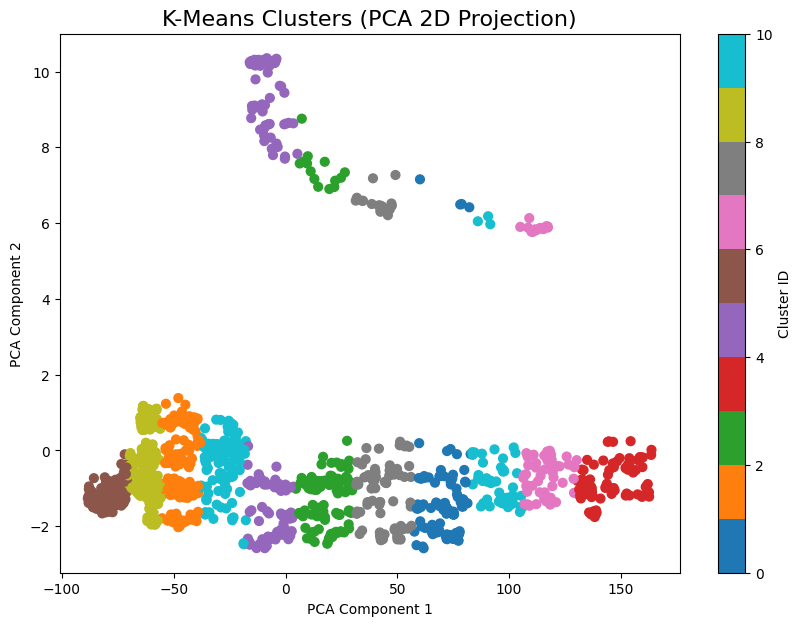

In [ ]:
# -----------------------------------------------
# Visualize clusters using PCA-reduced features
# -----------------------------------------------
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=cluster_labels,
    cmap="tab10",
    s=40
)
plt.title("K-Means Clusters (PCA 2D Projection)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster ID")
plt.show()


**5) Visualize TRUE labels to compare clustering vs ground truth**

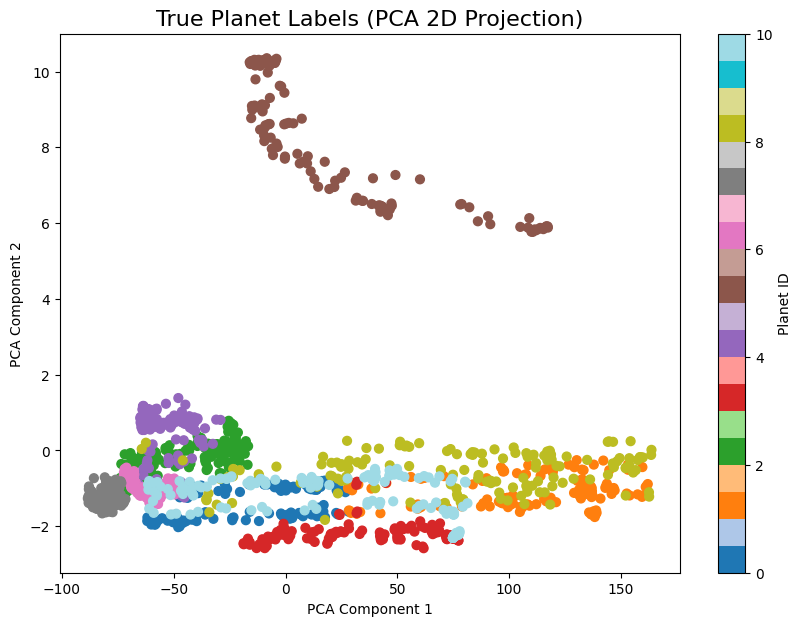

In [ ]:
# -----------------------------------------------
# Compare PCA visualization using TRUE labels
# -----------------------------------------------
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    cmap="tab20",
    s=40
)
plt.title("True Planet Labels (PCA 2D Projection)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Planet ID")
plt.show()



# **STEP 5: SUPERVISED LEARNING (SVM / RF )**



In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


**1) Train-test split for feature vectors**

In [ ]:
# --------------------------------------------------
# Re-split using feature vectors instead of raw imgs
# --------------------------------------------------
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_features, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train_f.shape)
print("Testing samples:", X_test_f.shape)


Training samples: (1191, 8123)
Testing samples: (298, 8123)


**2) TRAIN MODEL 1 — SVM**

In [ ]:
# --------------------------------------------------
# TRAIN: Support Vector Machine
# --------------------------------------------------
svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(X_train_f, y_train_f)

# PREDICT
y_pred_svm = svm.predict(X_test_f)

print("SVM Accuracy:", accuracy_score(y_test_f, y_pred_svm))
print("\nClassification Report (SVM):")
print(classification_report(y_test_f, y_pred_svm))


SVM Accuracy: 0.8523489932885906

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        30
           1       1.00      0.77      0.87        30
           2       0.60      1.00      0.75        30
           3       0.85      0.97      0.91        30
           4       1.00      0.83      0.91        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        29
           8       0.95      0.70      0.81        30
          10       0.68      0.52      0.59        29

    accuracy                           0.85       298
   macro avg       0.88      0.85      0.85       298
weighted avg       0.88      0.85      0.85       298



**3) TRAIN MODEL 2 — Random Forest**

In [ ]:
# --------------------------------------------------
# TRAIN: Random Forest
# --------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train_f, y_train_f)

# PREDICT
y_pred_rf = rf.predict(X_test_f)

print("Random Forest Accuracy:", accuracy_score(y_test_f, y_pred_rf))
print("\nClassification Report (RF):")
print(classification_report(y_test_f, y_pred_rf))


Random Forest Accuracy: 0.9966442953020134

Classification Report (RF):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30
           3       1.00      0.97      0.98        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        29
           8       0.97      1.00      0.98        30
          10       1.00      1.00      1.00        29

    accuracy                           1.00       298
   macro avg       1.00      1.00      1.00       298
weighted avg       1.00      1.00      1.00       298



**5) Confusion Matrix Visualization**

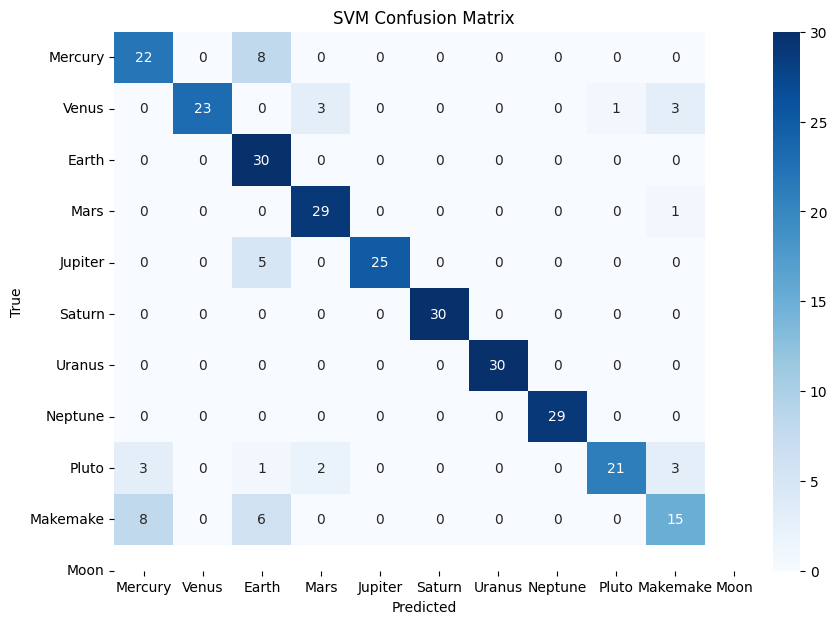

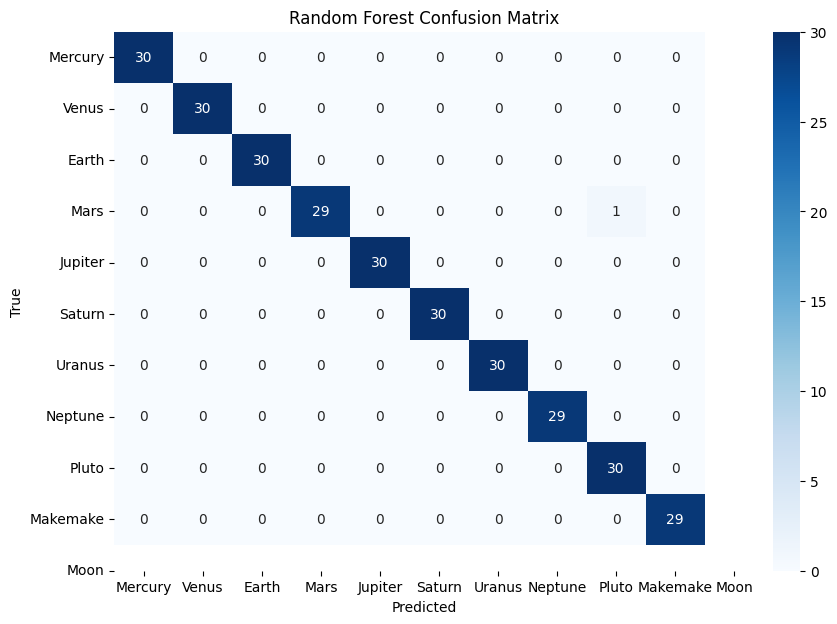

In [ ]:
# --------------------------------------------------
# Function to plot confusion matrices
# --------------------------------------------------
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=CLASSES,
                yticklabels=CLASSES)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# PLOT
plot_confusion_matrix(y_test_f, y_pred_svm, "SVM Confusion Matrix")
plot_confusion_matrix(y_test_f, y_pred_rf, "Random Forest Confusion Matrix")


# **STEP 6 — FINAL ANALYSIS**

**1) Compare K-Means cluster labels with true labels**

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame for comparison
analysis_df = pd.DataFrame({
    "True_Label": y,
    "Cluster_Label": cluster_labels
})

analysis_df["True_Name"] = analysis_df["True_Label"].apply(lambda x: CLASSES[x])


**2) Show cluster distribution vs true labels**

In [ ]:
print("\n=== Cluster Distribution vs True Labels ===\n")
cluster_table = pd.crosstab(analysis_df["Cluster_Label"],
                            analysis_df["True_Name"])
print(cluster_table)



=== Cluster Distribution vs True Labels ===

True_Name      Earth  Jupiter  Mars  Mercury  Moon  Neptune  Pluto  Saturn  \
Cluster_Label                                                                
0                  0        0    48        0    50        0     17       4   
1                 20       75     0       34    16        0      1       0   
2                  0        0    27       46    19        0     19      14   
3                  0        0     0        0     0        0     26       0   
4                  2        0    35       28    13        0      3      88   
5                 12        0     0        0     0      149      0       0   
6                  0        0     0        0     0        0     33      14   
7                  0        0    36        0    28        0     14      26   
8                 44       66     0       28    12        0      2       0   
9                  0        0     0        0     0        0     22       3   
10                

**3) Show which planets are commonly confused by SVM**

In [ ]:
# Convert numeric labels back to names
y_test_names = [CLASSES[i] for i in y_test_f]
y_pred_names = [CLASSES[i] for i in y_pred_svm]

misclassified = []

for true, pred in zip(y_test_names, y_pred_names):
    if true != pred:
        misclassified.append((true, pred))

print("\n=== Misclassified Samples (SVM) ===\n")
for m in misclassified:
    print("True:", m[0], "Predicted:", m[1])



=== Misclassified Samples (SVM) ===

True: Jupiter Predicted: Earth
True: Moon Predicted: Mercury
True: Moon Predicted: Mercury
True: Moon Predicted: Mercury
True: Venus Predicted: Mars
True: Jupiter Predicted: Earth
True: Moon Predicted: Earth
True: Mars Predicted: Moon
True: Venus Predicted: Moon
True: Moon Predicted: Earth
True: Moon Predicted: Earth
True: Moon Predicted: Earth
True: Mercury Predicted: Earth
True: Mercury Predicted: Earth
True: Mercury Predicted: Earth
True: Venus Predicted: Moon
True: Moon Predicted: Mercury
True: Venus Predicted: Mars
True: Moon Predicted: Mercury
True: Mercury Predicted: Earth
True: Mercury Predicted: Earth
True: Moon Predicted: Earth
True: Jupiter Predicted: Earth
True: Mercury Predicted: Earth
True: Pluto Predicted: Mars
True: Venus Predicted: Mars
True: Jupiter Predicted: Earth
True: Pluto Predicted: Moon
True: Mercury Predicted: Earth
True: Mercury Predicted: Earth
True: Moon Predicted: Earth
True: Pluto Predicted: Moon
True: Pluto Predicted

**4) Combine ALL results into one final dataframe**

In [ ]:
final_df = pd.DataFrame({
    "True_Label": y_test_names,
    "Predicted_Label": y_pred_names
})

print("\n=== FINAL PREDICTION RESULTS ===\n")
print(final_df.head(20))



=== FINAL PREDICTION RESULTS ===

   True_Label Predicted_Label
0     Mercury         Mercury
1        Mars            Mars
2       Venus           Venus
3        Mars            Mars
4     Jupiter           Earth
5       Venus           Venus
6       Earth           Earth
7      Uranus          Uranus
8        Mars            Mars
9      Saturn          Saturn
10      Earth           Earth
11       Moon         Mercury
12     Uranus          Uranus
13     Saturn          Saturn
14       Moon            Moon
15       Moon         Mercury
16     Uranus          Uranus
17    Neptune         Neptune
18     Saturn          Saturn
19       Moon         Mercury


**5) Compute accuracy for each class separately**

In [ ]:
print("\n=== Class-wise Accuracy (SVM) ===\n")
class_accuracy = {}

for planet in CLASSES:
    # total test samples of this planet
    total = sum(final_df["True_Label"] == planet)
    # correct predictions
    correct = sum((final_df["True_Label"] == planet) & (final_df["Predicted_Label"] == planet))

    if total == 0:
        class_accuracy[planet] = None
    else:
        class_accuracy[planet] = round(correct / total, 3)

print(class_accuracy)



=== Class-wise Accuracy (SVM) ===

{'Mercury': 0.733, 'Venus': 0.767, 'Earth': 1.0, 'Mars': 0.967, 'Jupiter': 0.833, 'Saturn': 1.0, 'Uranus': 1.0, 'Neptune': 1.0, 'Pluto': 0.7, 'Makemake': None, 'Moon': 0.517}


In [ ]:
print("\n=== Class-wise Accuracy (Random Forest) ===\n")
class_accuracy_rf = {}

# Convert numeric labels back to names for RF predictions
y_pred_rf_names = [CLASSES[i] for i in y_pred_rf]

# Create a temporary DataFrame for RF predictions for easy comparison
final_df_rf = pd.DataFrame({
    "True_Label": y_test_names,
    "Predicted_Label": y_pred_rf_names
})

for planet in CLASSES:
    # total test samples of this planet
    total = sum(final_df_rf["True_Label"] == planet)
    # correct predictions
    correct = sum((final_df_rf["True_Label"] == planet) & (final_df_rf["Predicted_Label"] == planet))

    if total == 0:
        class_accuracy_rf[planet] = None
    else:
        class_accuracy_rf[planet] = round(correct / total, 3)

print(class_accuracy_rf)



=== Class-wise Accuracy (Random Forest) ===

{'Mercury': 1.0, 'Venus': 1.0, 'Earth': 1.0, 'Mars': 0.967, 'Jupiter': 1.0, 'Saturn': 1.0, 'Uranus': 1.0, 'Neptune': 1.0, 'Pluto': 1.0, 'Makemake': None, 'Moon': 1.0}
